# SVM (Salary_Data)

1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person  
workclass	-- A work class is a grouping of work   
education	-- Education of an individuals  	
maritalstatus -- Marital status of an individulas	  
occupation	 -- occupation of an individuals  
relationship -- 	  
race --  Race of an Individual  
sex --  Gender of an Individual  
capitalgain --  profit received from the sale of an investment	  
capitalloss	-- A decrease in the value of a capital asset  
hoursperweek -- number of hours work per week	  
native -- Native of an individual  
Salary -- salary of an individual  


# 1. Import Libs

In [155]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as ac 
from sklearn.metrics import classification_report as report,roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [101]:
test_data = pd.read_csv('SalaryData_Test(1).csv')

train_data = pd.read_csv('SalaryData_Train(1).csv')


In [102]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [103]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 3. Data Preprocessing

In [104]:
df_temp = test_data.append(train_data)
df_temp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [105]:
train = train_data.copy()
test = test_data.copy()
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [106]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [107]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
str_c

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

    index  Salary
0   <=50K   34013
1    >50K   11208


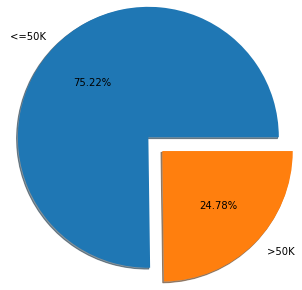

In [108]:
plt.rcParams['figure.figsize']=(3,3)
plt.pie(df_temp.Salary.value_counts().values, labels = df_temp.Salary.value_counts().index, autopct="%1.2f%%", radius =2, shadow=True, explode=(0,0.3))
print(df_temp.Salary.value_counts().reset_index())

In [109]:
for i in str_c:
    train[i]= LabelEncoder().fit_transform(train[i])
    test[i]=LabelEncoder().fit_transform(test[i])
    
mapping = {' >50K': 1, ' <=50K': 0}    
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [110]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [111]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [112]:
df = train.append(test) 

In [113]:
df1 = df.copy()
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [114]:
df1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,0.247849
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


In [115]:
df1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [116]:
workclass_df = df_temp.groupby(['Salary', 'workclass']).size().reset_index().rename(columns={0:'Num of individuals'})
workclass_df

,Salary,workclass,Num of individuals
0,<=50K,Federal-gov,857
1,<=50K,Local-gov,2185
2,<=50K,Private,26055
3,<=50K,Self-emp-inc,734
4,<=50K,Self-emp-not-inc,2737
5,<=50K,State-gov,1426
6,<=50K,Without-pay,19
7,>50K,Federal-gov,549
8,>50K,Local-gov,915
9,>50K,Private,7251


Text(0.5, 1.1, 'Workclass of individuals to corresponding Salary')

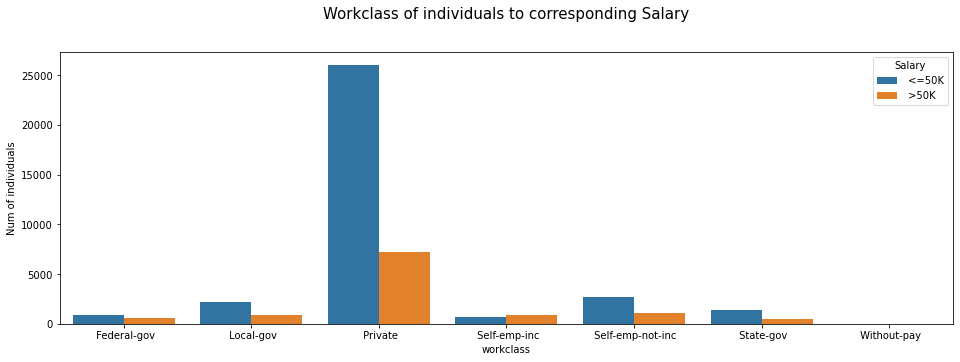

In [117]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'workclass', y='Num of individuals', hue='Salary', data=workclass_df)
plt.title("Workclass of individuals to corresponding Salary", y = 1.1, fontsize=15)

#### Most individuals are into private jobs with Salary <=50k.

#### In our data there are very less individual who are without pay opr unemployed

In [118]:
edu_df = df_temp.groupby(['Salary', 'education']).size().reset_index().rename(columns={0:'Num of individuals'})
edu_df.head()

,Salary,education,Num of individuals
0,<=50K,10th,1141
1,<=50K,11th,1530
2,<=50K,12th,534
3,<=50K,1st-4th,214
4,<=50K,5th-6th,427


Text(0.5, 1.03, 'Education of individuals to corresponding Salary')

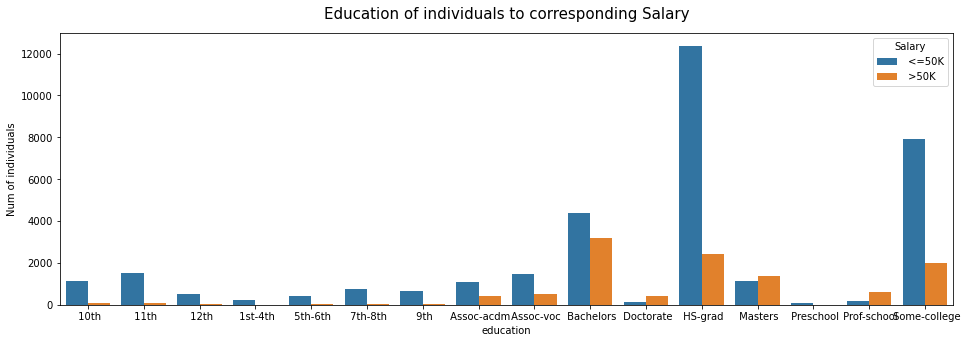

In [119]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'education', y='Num of individuals', hue = 'Salary', data=edu_df)
plt.title("Education of individuals to corresponding Salary", y = 1.03, fontsize=15)

In [120]:
rel_df = df_temp.groupby(['maritalstatus', 'relationship', 'Salary']).size().reset_index().rename(columns={0:'Num of indv'})
rel_df.head()

,maritalstatus,relationship,Salary,Num of indv
0,Divorced,Not-in-family,<=50K,2994
1,Divorced,Not-in-family,>50K,441
2,Divorced,Other-relative,<=50K,159
3,Divorced,Other-relative,>50K,7
4,Divorced,Own-child,<=50K,413


Text(0.5, 1.1, 'Salary category wrt Marital status')

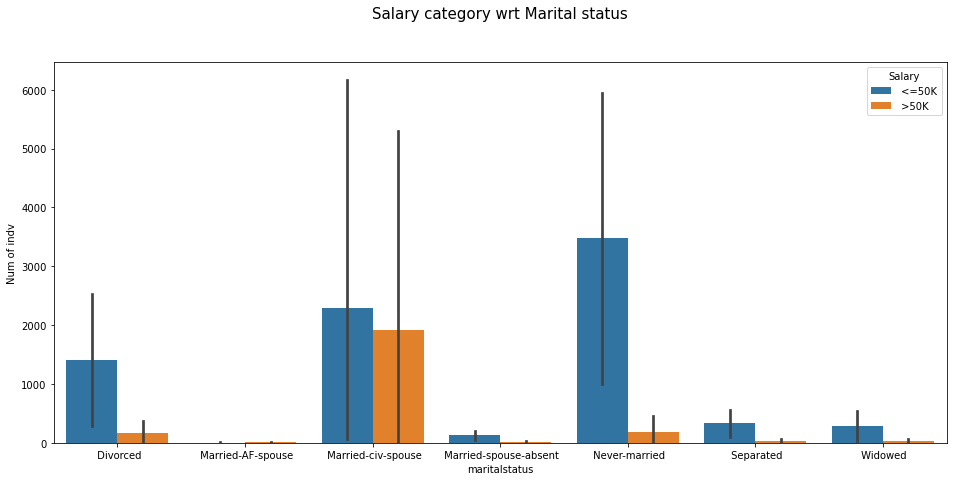

In [121]:
plt.figure(figsize=(16,7))
sns.barplot(x= 'maritalstatus', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Marital status", y = 1.1, fontsize=15)

#### Most individuals in our data are who have never married and are earning <=50k.

#### and  we have individuals who are married indv earning <=50k and then married indv earning >50k.

Text(0.5, 1.1, 'Salary category wrt Relationship')

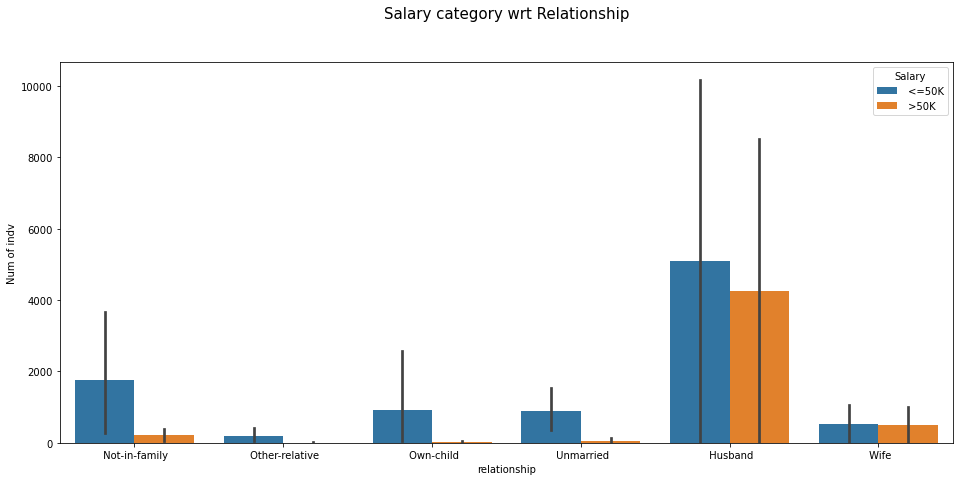

In [122]:
plt.figure(figsize=(16,7))
sns.barplot(x= 'relationship', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Relationship", y = 1.1, fontsize=15)

#### we can futher confirm that indv who are married, who have a husband are higher and are earning <=50k and >50k.

In [123]:
occ_df = df_temp.groupby(['occupation', 'workclass', 'Salary']).size().reset_index().rename(columns={0:'Num of Indv'})
occ_df_sort = occ_df.sort_values('Num of Indv', ascending=False)
occ_df_sort.head()

,occupation,workclass,Salary,Num of Indv
86,Other-service,Private,<=50K,3816
4,Adm-clerical,Private,<=50K,3679
19,Craft-repair,Private,<=50K,3631
125,Sales,Private,<=50K,3348
72,Machine-op-inspct,Private,<=50K,2498


Text(0.5, 1.01, 'Diff occupations with corresponding workclass')

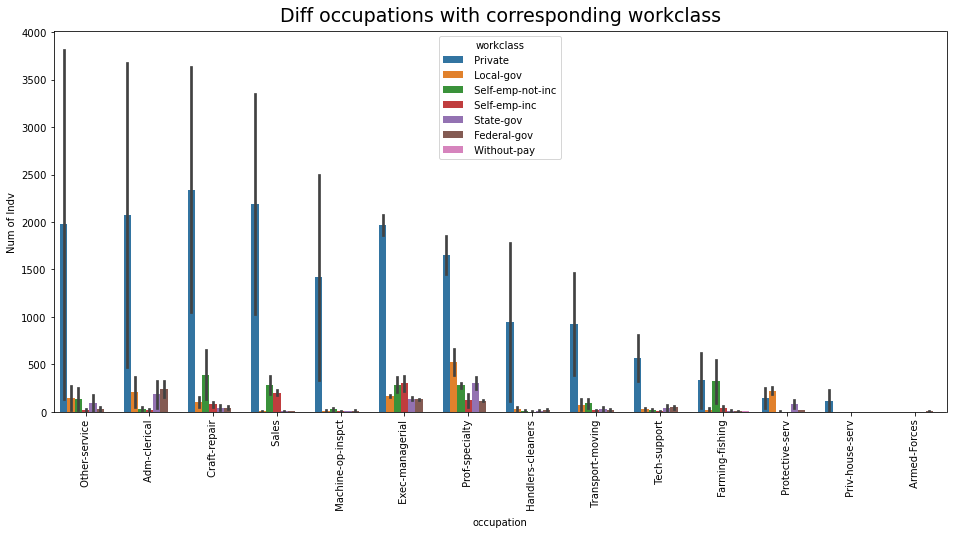

In [124]:
plt.figure(figsize=(16,7))
sns.barplot(x='occupation', y = 'Num of Indv', hue='workclass', data=occ_df_sort)
plt.xticks(rotation=90)
plt.title("Diff occupations with corresponding workclass", y=1.01, fontsize=19)

#### Private workclass indvs are highest in all occupations, except Protective-serv.

Text(0.5, 1.01, 'Salary categories corresponding to diff occupation')

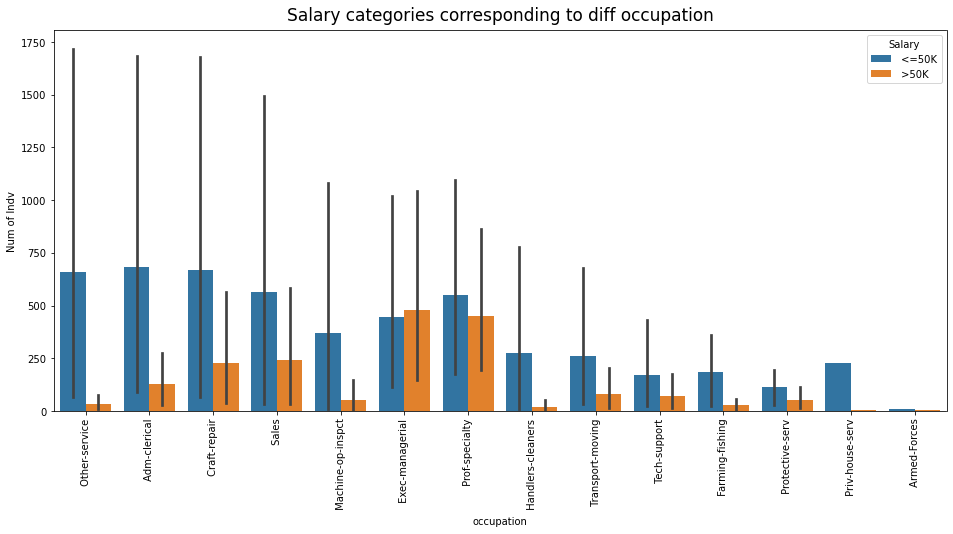

In [125]:
plt.figure(figsize=(16,7))
sns.barplot(x='occupation', y='Num of Indv', hue='Salary', data=occ_df_sort)
plt.xticks(rotation=90)
plt.title("Salary categories corresponding to diff occupation", y=1.01, fontsize=17)

In [126]:
race_df = df_temp.groupby(['Salary', 'race']).size().reset_index().rename(columns={0:'Num of indv'})
race_df_sort = race_df.sort_values('Num of indv', ascending=False)
race_df_sort

,Salary,race,Num of indv
4,<=50K,White,28695
9,>50K,White,10207
2,<=50K,Black,3694
1,<=50K,Asian-Pac-Islander,934
7,>50K,Black,534
0,<=50K,Amer-Indian-Eskimo,382
6,>50K,Asian-Pac-Islander,369
3,<=50K,Other,308
5,>50K,Amer-Indian-Eskimo,53
8,>50K,Other,45


Text(0.5, 1.02, 'Salary dist according to race')

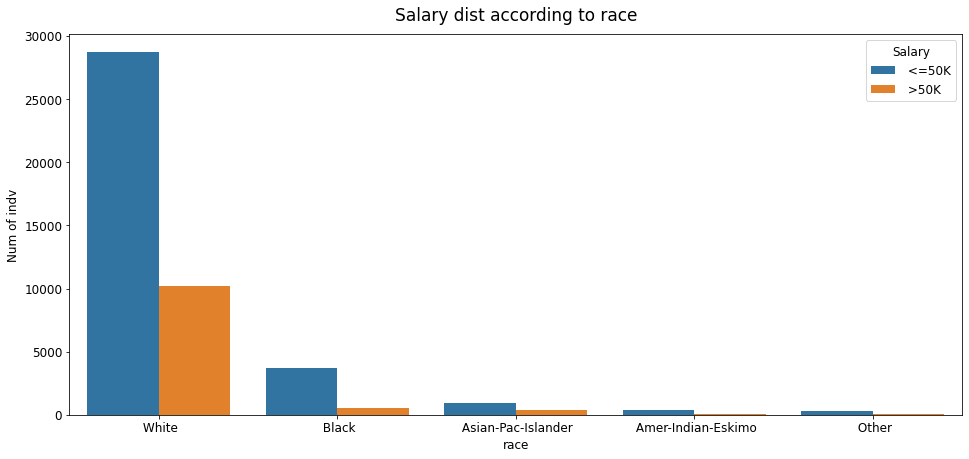

In [156]:
plt.figure(figsize=(16,7))
sns.barplot(x = 'race', y='Num of indv', hue='Salary', data=race_df_sort)
plt.title("Salary dist according to race", y=1.02, fontsize=17)

#### there are more indv of race 'white' who are highest in number in our data and in both salary category <=50k and >50k.

In [128]:
sex_df = df_temp.groupby(['Salary', 'sex']).size().reset_index().rename(columns={0:'Num of indv'})
sex_df_sort = sex_df.sort_values('Num of indv', ascending=False)
sex_df_sort

,Salary,sex,Num of indv
1,<=50K,Male,20988
0,<=50K,Female,13025
3,>50K,Male,9539
2,>50K,Female,1669


Text(0.5, 1.02, 'Salary dist according to sex')

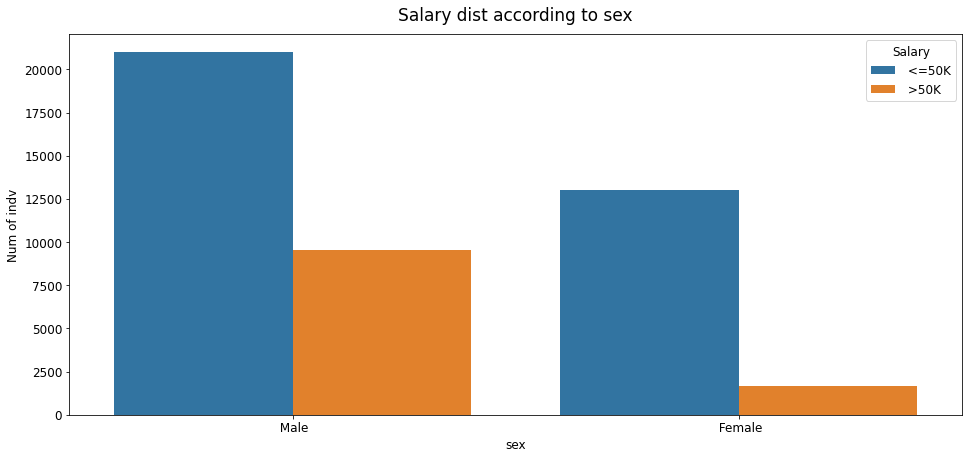

In [157]:
plt.figure(figsize=(16,7))
sns.barplot(x = 'sex', y='Num of indv', hue='Salary', data=sex_df_sort)
plt.title("Salary dist according to sex", y=1.02, fontsize=17)

#### Overall trend is male are doing more jobs than female and have higher ratio in both salary categories.

In [130]:
nat_df = df_temp.groupby(['Salary','native']).size().reset_index().rename(columns={0:'Num of indv'})
nat_df_sort = nat_df.sort_values('Num of indv', ascending=False)
nat_df_sort.head()

,Salary,native,Num of indv
37,<=50K,United-States,30844
77,>50K,United-States,10448
24,<=50K,Mexico,856
28,<=50K,Philippines,199
31,<=50K,Puerto-Rico,155


Text(0.5, 1.01, 'Top 10 native locations corresponding to Salary')

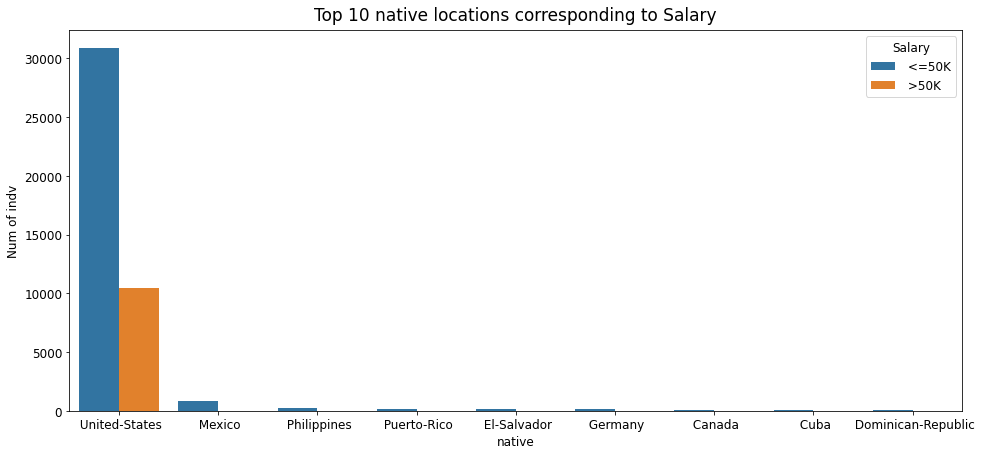

In [158]:
plt.figure(figsize=(16,7))
sns.barplot(x='native', y='Num of indv', hue='Salary', data=nat_df_sort.head(10))
plt.title("Top 10 native locations corresponding to Salary", fontsize=17, y=1.01)

#### Majority of indv are native to US.

### Finding Correlation

In [132]:
corr = df1.corr()

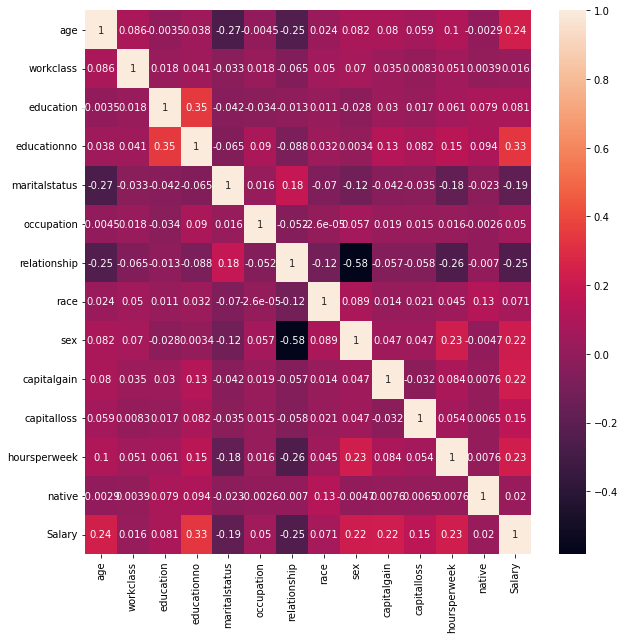

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [134]:
df1.index.is_unique

False

In [135]:
df1=df1.loc[~df1.index.duplicated(), :]

Skew: -0.305378355820322
Kurtosis: 0.643604835875955


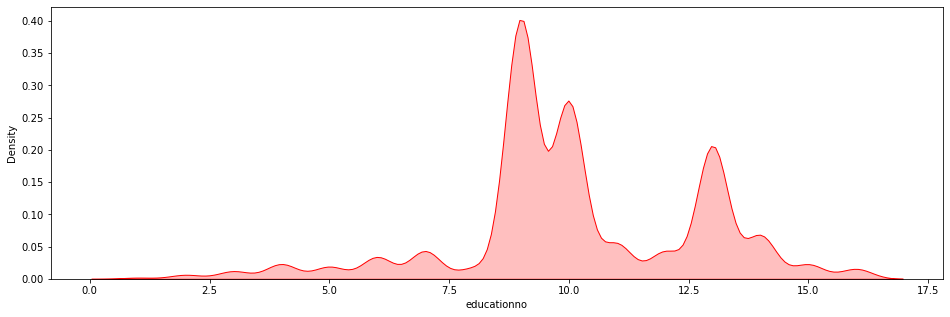

In [136]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
sns.kdeplot(df1['educationno'],shade=True,color='r')
plt.show()

#### The Data is negatively skewed and has Low Kurtosis value

#### Most of people have eduction Number of years of education 8 - 11

In [137]:
dfa = df_temp[df_temp.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object')

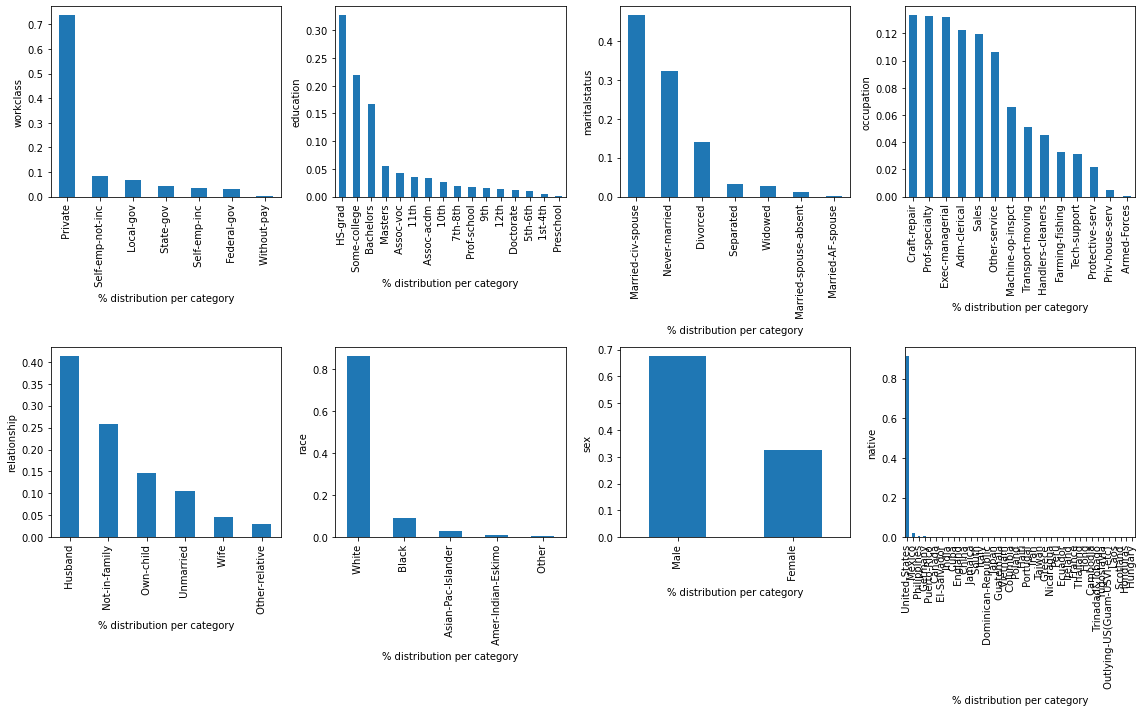

In [138]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,4,i)
    df_temp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 

In [139]:
num_columns = dfa.select_dtypes(exclude='object')

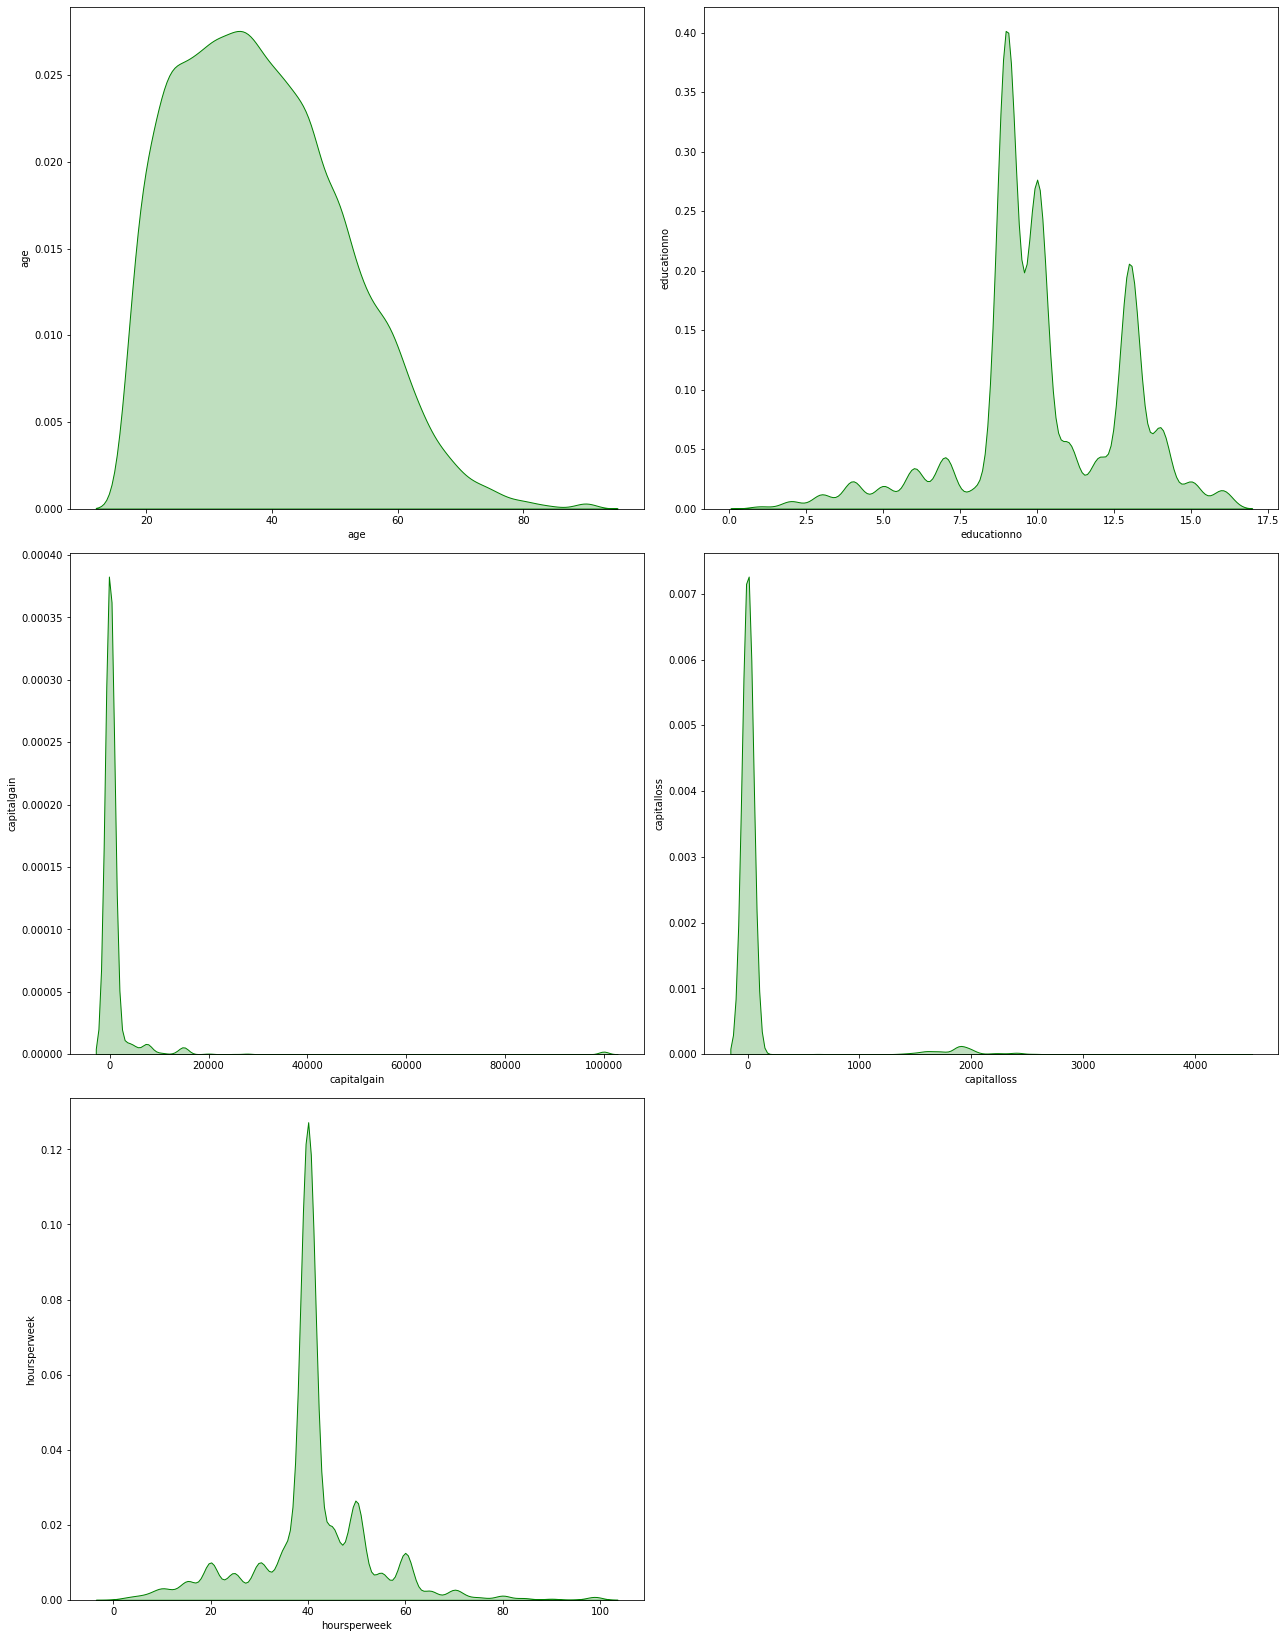

In [140]:
plt.figure(figsize=(18,30))
for i,col in enumerate(num_columns,1):
    plt.subplot(4,2,i)
    sns.kdeplot(df1[col],color='g',shade=True,legend=True)
    plt.ylabel(col)
plt.tight_layout() 
plt.show()

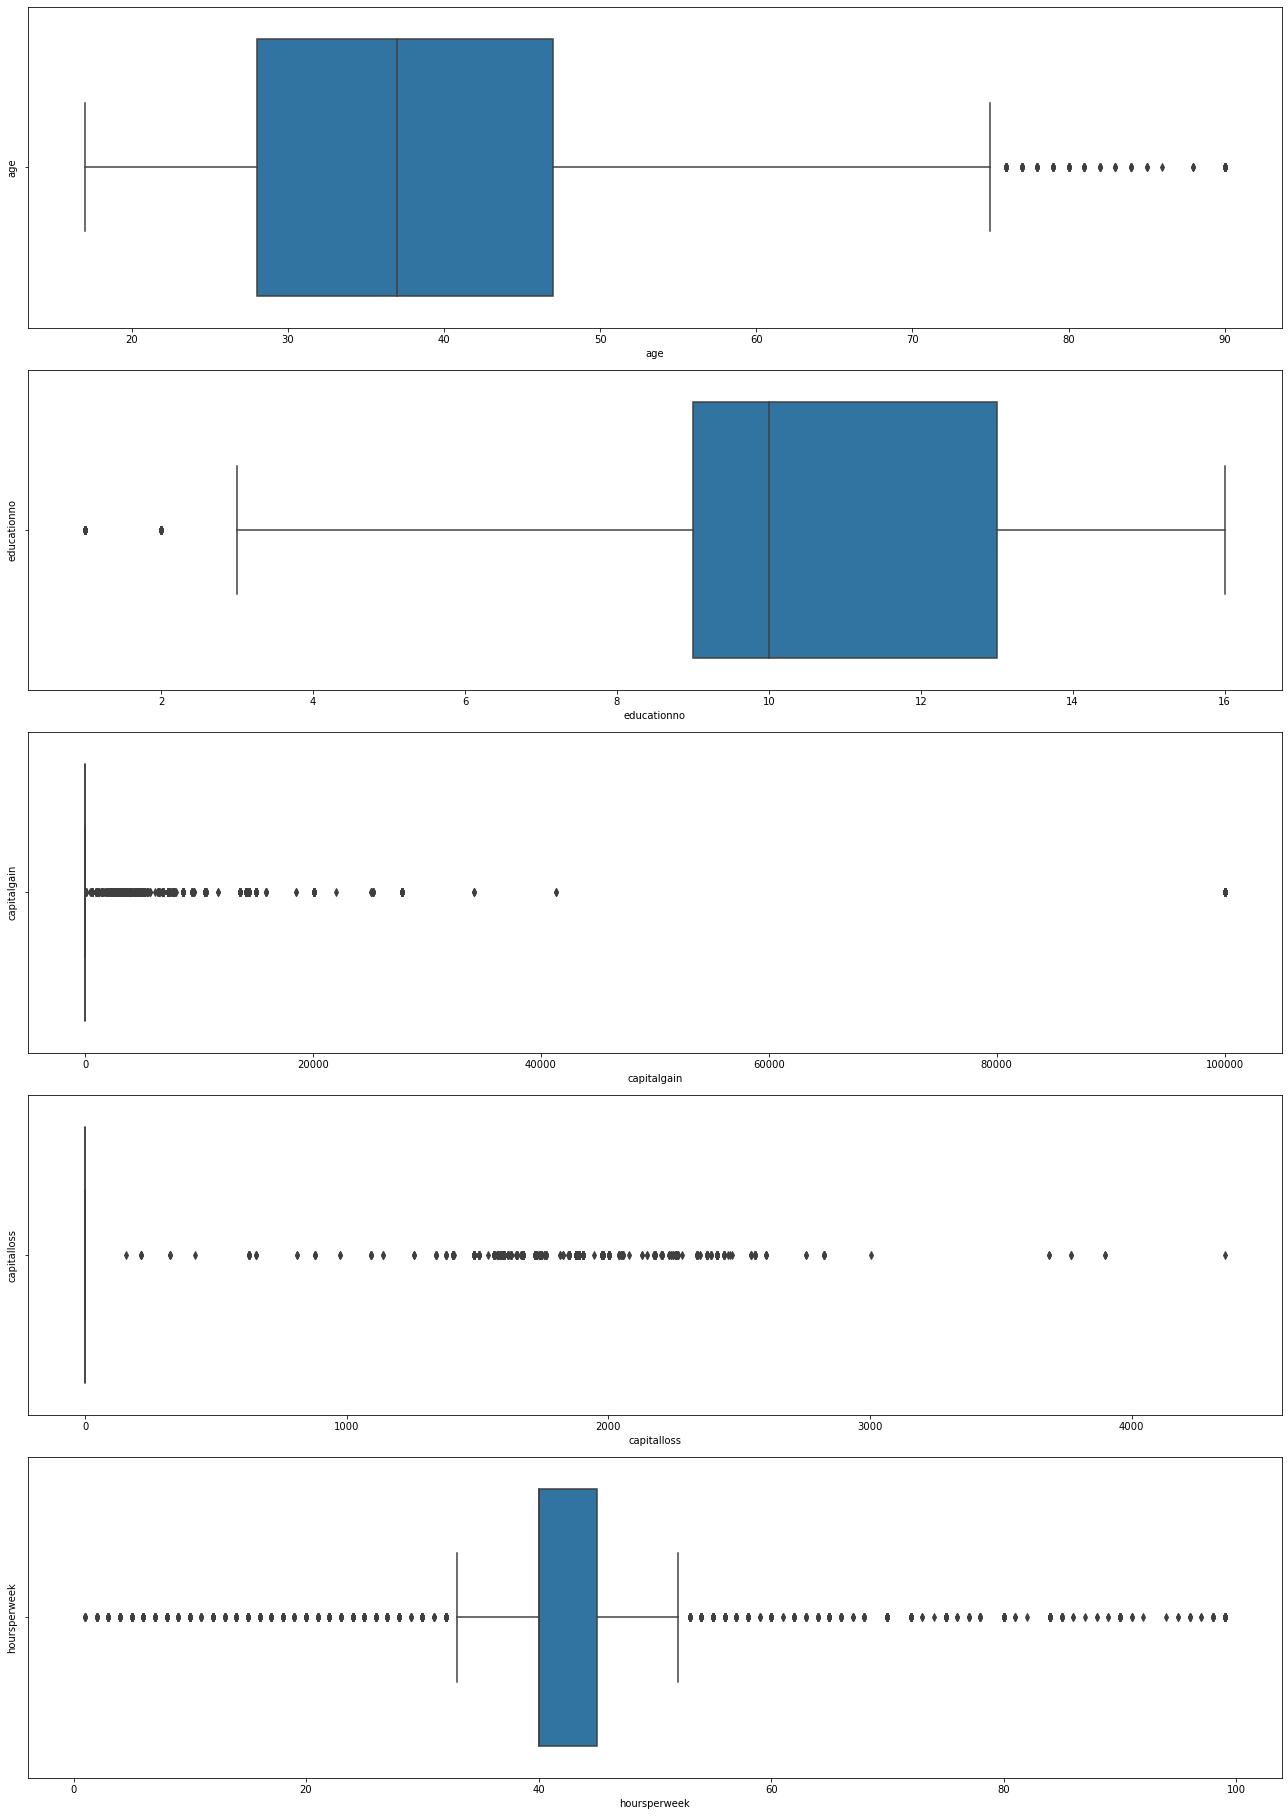

In [141]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,1,i)
    sns.boxplot(df1[col])
    plt.ylabel(col)
plt.tight_layout() 
plt.show()    

In [142]:
pd.DataFrame(data=[num_columns.skew(),num_columns.kurtosis()],index=['skewness','kurtosis'])

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


# 4. Model Building

## SVM

In [143]:
col = df1.columns
col

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [144]:
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]

In [145]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [146]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

## 4.1 Linear

In [147]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8098273572377158


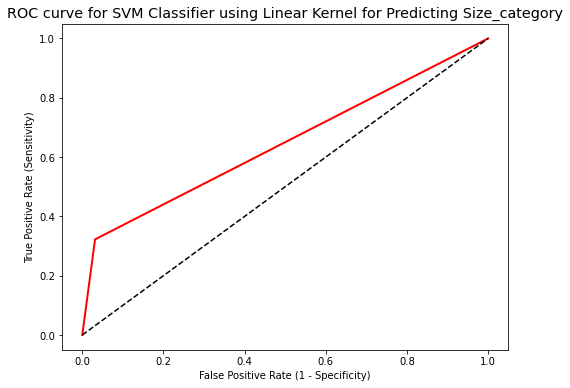

ROC AUC : 0.6455


In [148]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_linear)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_test_linear)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

## 4.2 Poly

In [149]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8435590969455511


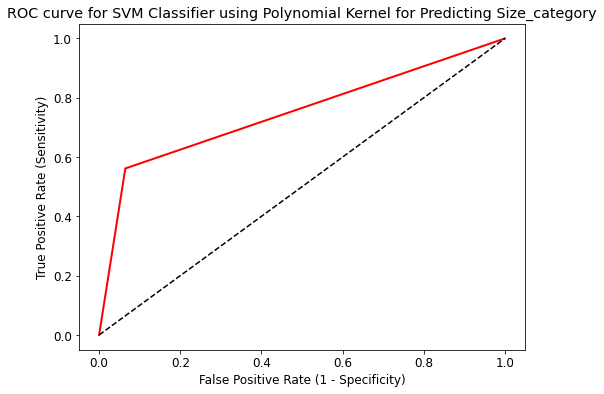

ROC AUC : 0.7485


In [150]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_poly)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_test_poly)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

## 4.3 RBF

In [151]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


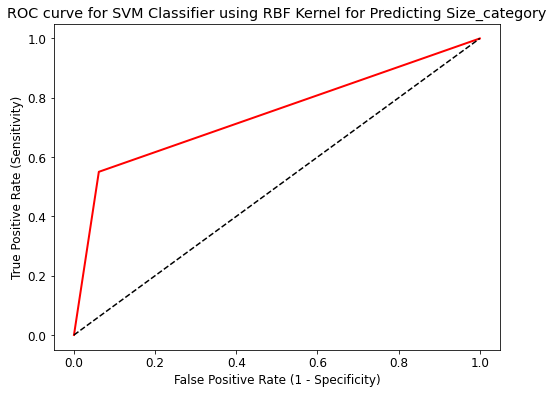

ROC AUC : 0.7445


In [152]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_rbf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using RBF Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_test_rbf)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

## 4.4 Sigmoid

In [153]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.5768924302788845


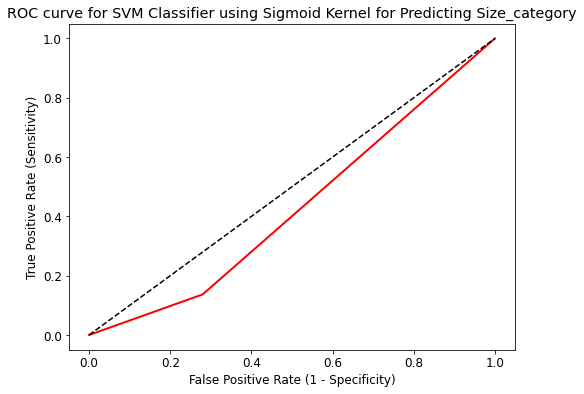

ROC AUC : 0.4285


In [154]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_sigmoid)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Sigmoid Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_test_sigmoid)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

### The Poly Model has best accuracy compare to other Models. but RBF model  has almost equal Accuracy to  Poly Model

# END